In [1]:
# Installing transformers for language processing
!pip install transformers

In [2]:
# Loading Encoder Decoder model
from transformers import VisionEncoderDecoderModel,ViTFeatureExtractor,AutoTokenizer

In [3]:

import torch
from PIL import Image

In [5]:
model=VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

In [17]:
# Loading feature extractor and tokenizer
feature_extracter=ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer=AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [9]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [11]:
# Max length and maximum no of beams
max_length=16
num_beams=4
gen_kwargs={"max_length":max_length,"num_beams":num_beams}

In [15]:
# predicting for the pretrained model
def predict_step(image_paths):
  images=[]
  for image_path in image_paths:
    i_image=Image.open(image_path)
    if i_image.mode!="RGB":
      i_image=i_image.convert(mode="RGB")
    images.append(i_image)

  pixel_values=feature_extracter(images=images, return_tensors='pt').pixel_values
  pixel_values=pixel_values.to(device)
  output_ids=model.generate(pixel_values,**gen_kwargs)
  preds=tokenizer.batch_decode(output_ids,skip_special_tokens=True)
  preds=[pred.strip() for pred in preds]
  return preds



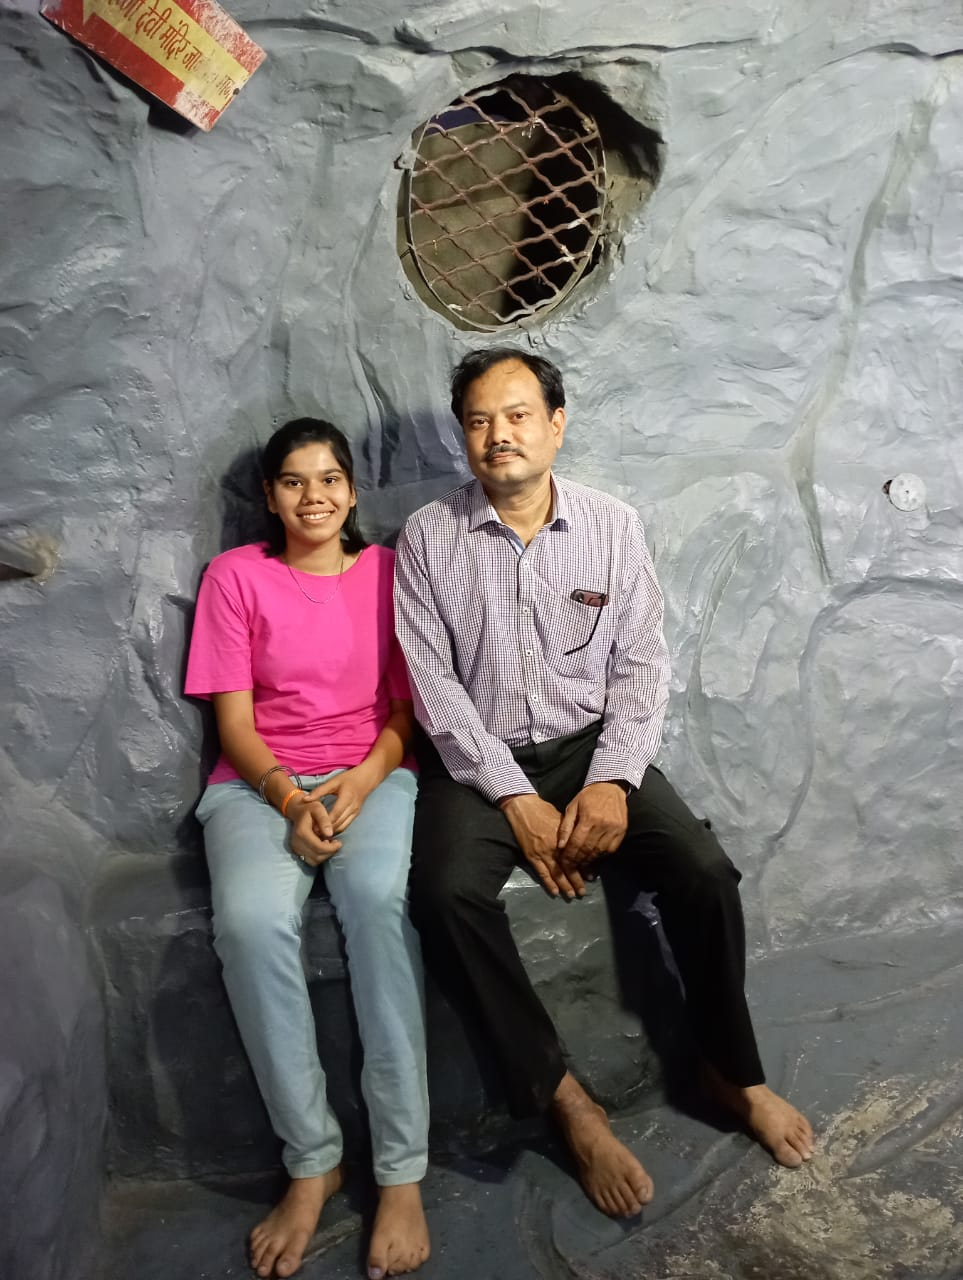

In [26]:
from PIL import Image
im=Image.open('papa.jpg')

im


In [27]:
predict_step(['papa.jpg'])

['a man and a woman standing next to each other']

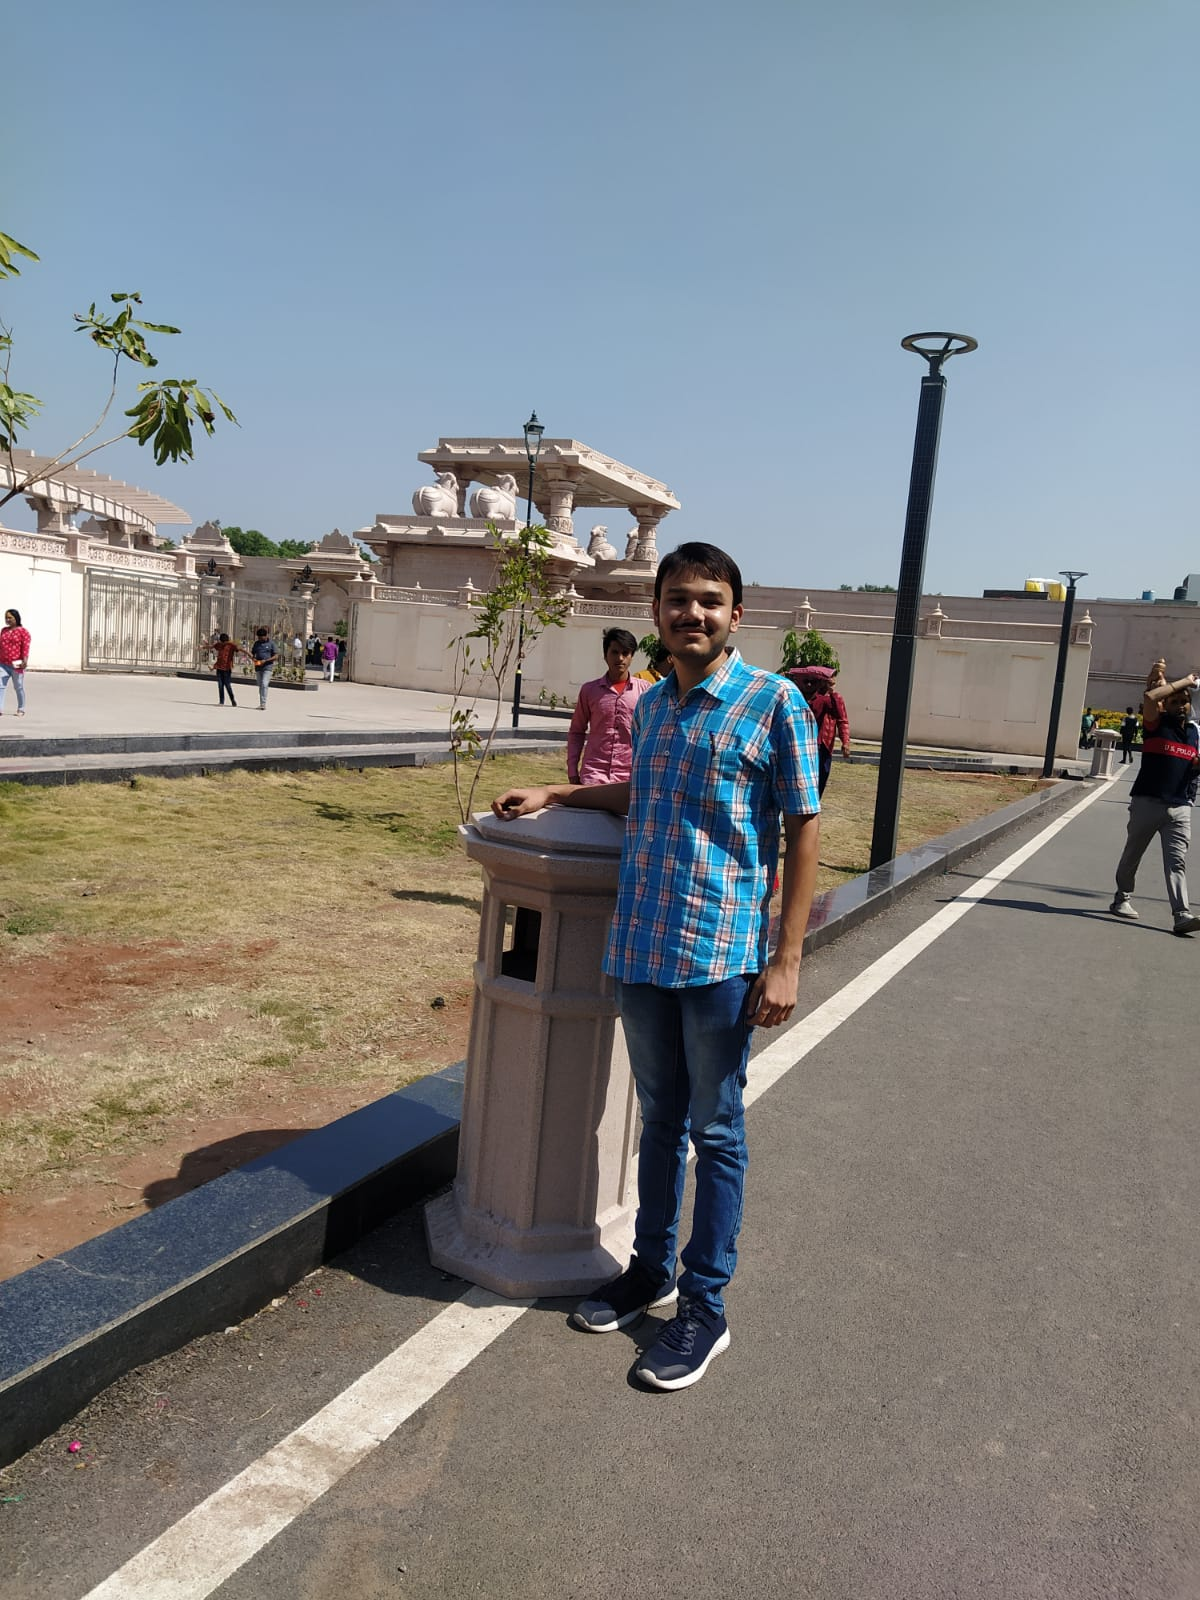

In [29]:
from PIL import Image
im=Image.open('/content/8204856a-836a-4984-be6b-c1572ac56b2b.jpg')

im

In [30]:
predict_step(['/content/8204856a-836a-4984-be6b-c1572ac56b2b.jpg'])

['a man standing on a sidewalk next to a fire hydrant']